In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#orginal project idea is sourced here:
#https://medium.com/@kokobiyu/weather-forecasting-with-python-machine-learning-beginner-50bf41ddf4e
data = pd.read_csv("seattle-weather.csv")
data.head()



,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
#turn into dataframe, check types, and clean where needed
df = pd.DataFrame(data)
print(df.dtypes)
#check for na's
print("\nMissing values in df:\n",df.isna().sum())

#since date and weather are objects we are going to change
#date to a date type and weather to a qualitative encoding since it is nominal not ordinal.
#to_datetime is
encoder = OneHotEncoder()
df['date'] = pd.to_datetime(df['date'])
#One-hot encode the 'weather' column.
#encoder = OneHotEncoder(sparse=False, drop='first')
#weather_encoded = pd.get_dummies(df['weather'], drop_first=True)  #avoid dummy variables
#but the encoded and og df together, drop the orginal weather column
#df = pd.concat([df, weather_encoded], axis=1)
#df.drop('weather', axis=1, inplace=True)

#had to switch encoding so its an int instead of a label, the one hot didn't work well with thte training of the model
from sklearn.preprocessing import LabelEncoder
df['weather']=LabelEncoder().fit_transform(df['weather'])

print(df.dtypes)
print(df.head())


date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

Missing values in df:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                   int64
dtype: object
        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7        0
1 2012-01-02           10.9      10.6       2.8   4.5        2
2 2012-01-03            0.8      11.7       7.2   2.3        2
3 2012-01-04           20.3      12.2       5.6   4.7        2
4 2012-01-05            1.3       8.9       2.8   6.1        2


Text(0.5, 1.0, 'Temperature Over Time in Seattle')

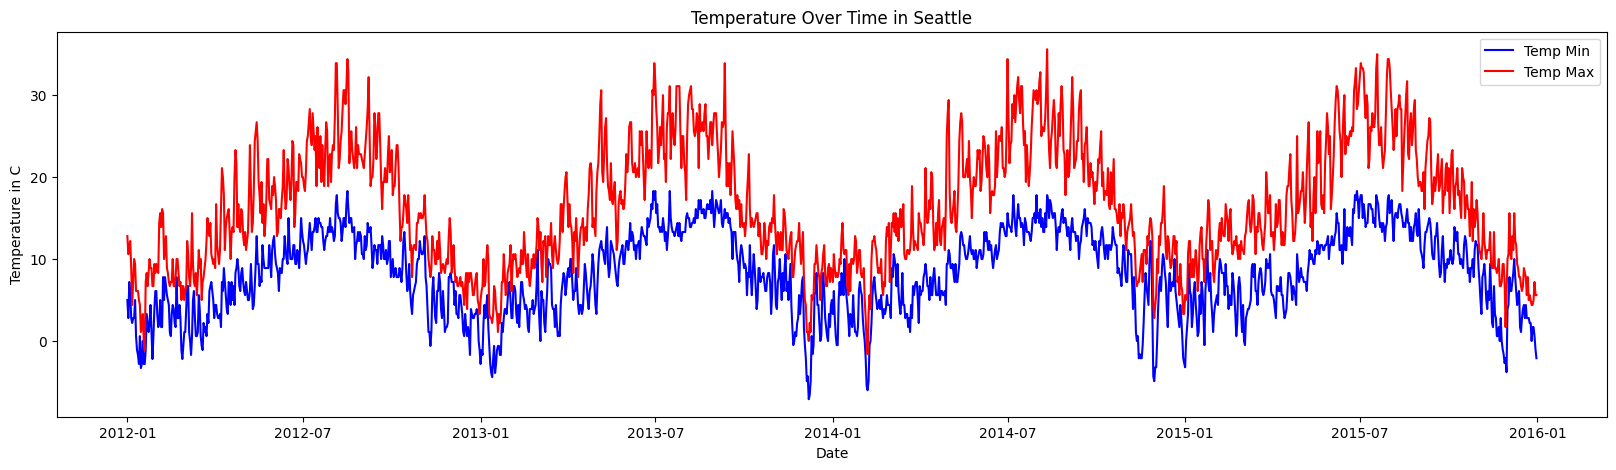

In [8]:
#make some visualizations!
#Time series line graph of min and max temps

plt.figure(figsize=(20,5))
plt.plot(df['date'], df['temp_min'], label='Temp Min', color='blue')
plt.plot(df['date'], df['temp_max'], label='Temp Max', color='red')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.title('Temperature Over Time in Seattle')


In [9]:
#lets do a box plot by average temperatures per month
#group the dates by month from orginal df
df['month'] = df['date'].dt.month_name()

#this code lightly follows this weather forecasting turtorial
#It uses plotly because matplotlib's box plot for this idea was really not working too well
#I would like to see an example on how to get it to work in matplotlib. Not sure if i was over thinking it
fig = px.box(df, df.month, ['temp_min', 'temp_max'])
fig.update_layout(title='Boxplot of temperatures from 2012 to 2015 in Seattle')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Temperature C')
fig.show()


In [14]:
#Predict weather based on wind, precieptation, min temp, max temp
vars = ["precipitation","temp_max","temp_min","wind"]
X = df[vars]
yHat = df.weather
# using the train test split function
#random state is like a seed
#test size percent that is test values
#pretty sure shuffle just ensures the dates aren't in order, at least thats why I put it there
Xtrain, Xtest, yTrain, yTest = train_test_split(X,yHat , random_state=104, test_size=0.25, shuffle=True)
#I am using knn in data mining so gonna try that here, the example used knn but had worse results, so gonna see how good we can get it with some tweaking
neigh = KNeighborsClassifier()
neigh = neigh.fit(Xtrain,yTrain)
score = neigh.score(Xtest, yTest) * 100
print(f"KNN accuracy: {score}")

#using gridcv to tune hyperparameters

KNN accuracy: 77.8688524590164


In [16]:
#using gridcv to tune hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

#Perform grid search
grid_search = GridSearchCV(estimator=neigh, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(Xtrain, yTrain)

#Get best parameters
best_params = grid_search.best_params_

#Evaluate model
optimizedModel = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
optimizedModel.fit(Xtrain, yTrain)
score = optimizedModel.score(Xtest, yTest) * 100
print(f"KNN accuracy: {score}")

KNN accuracy: 78.14207650273224


In [17]:
!jupyter --to html

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel kernelspec migrate nbclassic
nbconvert nbextension notebook run server serverextension troubleshoot trust

Jupyter command `jupyter-html` not found.
